## Generating two dimensional cluster states

In this notebook we generate two dimensional, 2 by n ladder, cluster states with the sequential emission protocol

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.sparse as sps

import cirq
from qutip import *

import qutrit_utils
import graph_state_gen_circuits as gsg

In [2]:
### system parameters
qus = [2,4,6,8,10]

waittimes = [0.125, 0.2, 0.125, 0.125, 0.075, 0.205, 0.275] # T_h, T_cz, T_pief, T_cnot, T_wait, T_swap1, T_swap2
coherence_times1 = [27, 22, 16, 12]
coherence_times2 = [22, 23, 4, 6]

nparams = [0.0, 0.02, 0.01, 0.0]

In [3]:
##-- initialize the simulators
simulator = cirq.Simulator()
dsim = cirq.DensityMatrixSimulator()

In [4]:
gsg.leak_cluster_state_2D(4, 0.0, 0.0, 0.0)

┌────────────────────┐                   ┌──┐
0 (d=3): ───[H]───[Q3_CZ]───[pi_ef]────[CX_Q3_Q2]──────────────[H]───[Q3_CZ]────X─────
                  │                    │                             │          │
1 (d=3): ───[H]───@─────────[pi_ef]────┼─────────[CX_Q3_Q2]────[H]───@──────────┼X────
                                       │         │                              ││
2: ────────────────────────────────────┼─────────┼──────────────────────────────X┼────
                                       │         │                               │
3: ────────────────────────────────────┼─────────┼───────────────────────────────X────
                                       │         │
4: ────────────────────────────────────@─────────┼────────────────────────────────────
                                                 │
5: ──────────────────────────────────────────────@────────────────────────────────────
                                      └────────────────────┘                   └──┘

In [5]:
gsg.noisy_cluster_state_2D(4, waittimes, coherence_times1, coherence_times2, nparams)

┌────────────────────┐                                                                                                                                           ┌──┐
0 (d=3): ───[Q3_AD]───[Q3_PD]───[H]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[Q3_CZ]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[pi_ef]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]────[CX_Q3_Q2]──────────────[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[H]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[Q3_CZ]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]────X─────[Q3_AD]───[Q3_PD]───
                                                                              │                                                                                                    │                                                                                                             │                                                  │
1 (d=3): ───[Q3_AD]───[Q3_PD]───[H]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───@─────────[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[pi_ef]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]────┼─────────[CX_Q3_Q2]────[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[H]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───@─────────[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]────┼X────[Q3_AD]───[Q3_PD]───
                                                                                                                                                                                   │         │                                                                                                                                                      ││
2: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X┼────────────────────────
                                                                                                                                                                                   │         │                                                                                                                                                       │
3: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X────────────────────────
                                                                                                                                                                                   │         │
4: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@─────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                                                             │
5: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                                                  └────────────────────┘                      

## Generating the states

In [6]:
%%time
### the ideal states
noiseless_states = []

for qu in qus:
    #- run the circuit
    ideal_run = simulator.simulate(gsg.leak_cluster_state_2D(qu,0,0,0))
    
    #- ideal state in csr form
    ideal_rho = sps.csr_matrix(np.outer(np.conj(ideal_run.final_state_vector), ideal_run.final_state_vector))
    
    #- ideal state as qutip object
    irho = Qobj(ideal_rho, dims = [[3,3] + [2]*qu, [3,3] + [2]*qu])
    
    #- reduced state of the qubit register (trace out the storages)
    irho_qubits = ptrace(irho, list(range(2, qu+2)))
    
    noiseless_states.append(irho_qubits)
    
    print("Computation for %d qubits, done -->>" % qu)
#

Computation for 2 qubits, done -->>
Computation for 4 qubits, done -->>
Computation for 6 qubits, done -->>
Computation for 8 qubits, done -->>
Computation for 10 qubits, done -->>
CPU times: user 1.59 s, sys: 270 ms, total: 1.86 s
Wall time: 1.87 s


In [7]:
%%time
### the decoherence limited states
deco_states = []

for qu in qus:
    #- run the circuit
    deco_run = dsim.simulate(gsg.noisy_cluster_state_2D(qu, waittimes, coherence_times1, coherence_times2, [0,0,0,0]))
    
    #- deco state in csr form
    deco_rho = sps.csr_matrix(deco_run.final_density_matrix)
    
    #- ideal state as qutip object
    drho = Qobj(deco_rho, dims = [[3,3] + [2]*qu, [3,3] + [2]*qu])
    
    #- reduced state of the qubit register (trace out the storages)
    drho_qubits = ptrace(drho, list(range(2, qu+2)))
    
    deco_states.append(drho_qubits)
    print("Computation for %d qubits, done -->>" % qu)
#

Computation for 2 qubits, done -->>
Computation for 4 qubits, done -->>
Computation for 6 qubits, done -->>
Computation for 8 qubits, done -->>
Computation for 10 qubits, done -->>
CPU times: user 35.5 s, sys: 7.99 s, total: 43.5 s
Wall time: 37.6 s


In [8]:
%%time
### the noisy states
noisy_states = []

for qu in qus:
    #- run the circuit
    noisy_run = dsim.simulate(gsg.noisy_cluster_state_2D(qu, waittimes, coherence_times1, coherence_times2, nparams))
    
    #- deco state in csr form
    noisy_rho = sps.csr_matrix(noisy_run.final_density_matrix)
    
    #- ideal state as qutip object
    nrho = Qobj(noisy_rho, dims = [[3,3] + [2]*qu, [3,3] + [2]*qu])
    
    #- reduced state of the qubit register (trace out the storages)
    nrho_qubits = ptrace(nrho, list(range(2, qu+2)))
    
    noisy_states.append(nrho_qubits)
    
    print("Computation for %d qubits, done -->>" % qu)
#

Computation for 2 qubits, done -->>
Computation for 4 qubits, done -->>
Computation for 6 qubits, done -->>
Computation for 8 qubits, done -->>
Computation for 10 qubits, done -->>
CPU times: user 42.5 s, sys: 17.6 s, total: 1min
Wall time: 38 s


### Fidelities

In [9]:
fides_deco = []
fides_noisy = []

for qq in range(len(qus)):
    fdeco = fidelity(deco_states[qq], noiseless_states[qq])**2
    ndeco = fidelity(noisy_states[qq], noiseless_states[qq])**2
    
    fides_deco.append(fdeco)
    fides_noisy.append(ndeco)
    
    print(qus[qq], fdeco, ndeco)
#

2 0.97877775892265 0.9640561882642849
4 0.9226264531204315 0.838034275532221
6 0.8696301104459379 0.7480831733577066
8 0.8196810459688116 0.6621446629020156
10 0.7726027540049001 0.5873400709100739


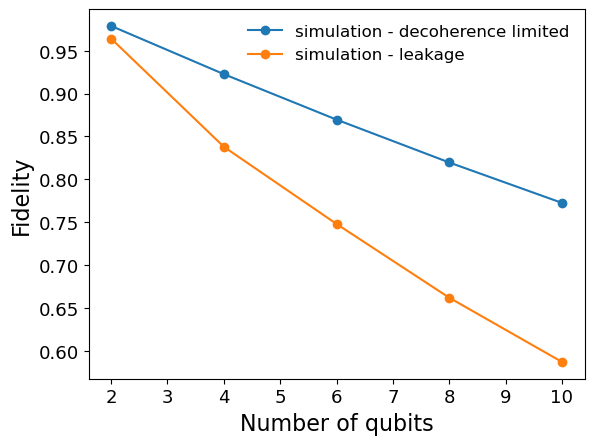

In [18]:
plt.plot(qus, fides_deco, "o-", label = "simulation - decoherence limited")
plt.plot(qus, fides_noisy, "o-", label = "simulation - leakage")

plt.legend(loc = "upper right", fontsize = 12, frameon = False)
plt.xlabel("Number of qubits", fontsize = 16)
plt.ylabel("Fidelity", fontsize = 16)
plt.tick_params(axis = "both", labelsize = 13)
plt.show()

## Exporting the states

In [20]:
### path
#patho = "/Users/munm2002/Documents/projects/graph_states_for_ent_witness/data_states/cluster_state_2D/"

In [19]:
# ### save the states
# for ii in range(len(qus)):

#     qsave(noisy_states[ii], patho+"cluster_state_2D_%dqubits_2x%d.qu" % (qus[ii], int(qus[ii]/2)))

#     print("Size %d, completed -->>" % (qus[ii]))
# #